In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df1 = pd.read_csv('test (1).csv')

In [4]:
df = pd.concat([df,df1])
'''
both are 2 parts of the same dataset, so concatenated for now.
'''

'\nboth are 2 parts of the same dataset, so concatenated for now.\n'

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### WHY EDA?
Before analysing the data, we can't proceed to use it for model building. say, data is skewed. most of the ml models require normal dist. if we don't know beforehand, that the data is skewed and we apply ml models, it won't give the best results.
- EDA helps us to analyse the data thoroughly and to bring out hidden patterns and insights from the data.
- also validates our assumptions if they are wrong.
- helps in handling missing values and detecting outliers.

### Bifurcate the columns according to their typesL:-
- Numerical - Age, Fare, PassengerId
- Categorical - Survived, Pclass, Sex, SibSp, Parch,Embarked
- Mixed - Name, Ticket, Cabin

### Explanation for types:-

- numerical = should be numbers, also should not be categorical
- categorical = may be numbers or may be strings, but categorical in nature
- mixed = are obviously not just numbers, they are strings which are NOT categorical in nature. (look at the above table for more info)

NOTE:- Sibsp = no. of siblings and spouse with you. Parch = no. of parents and children with you.

### UNIVARIATE ANALYSIS:-

### Steps of doing Univariate Analysis on **Numerical columns**
- **Descriptive Statistics**: Compute basic summary statistics for the column, meaure of **central tendency and dispersion**, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

- **Visualizations**: Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

- **Identifying Outliers**: Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

- **Skewness:** Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

- **Missing values**: Check for % of missing values.

- **Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

In [ ]:
#Numerical - Age, Fare, PassengerId
#STARTING WITH AGE:-
#step 1:-
df['Age'].describe()
'''
we can see mean and median almost same, depicting the property of normal dist, in which mean = median = mode.
'''

,Age
count,1046.000000
mean,29.881138
std,14.413493
min,0.170000
25%,21.000000
50%,28.000000
75%,39.000000
max,80.000000


<Axes: ylabel='Density'>

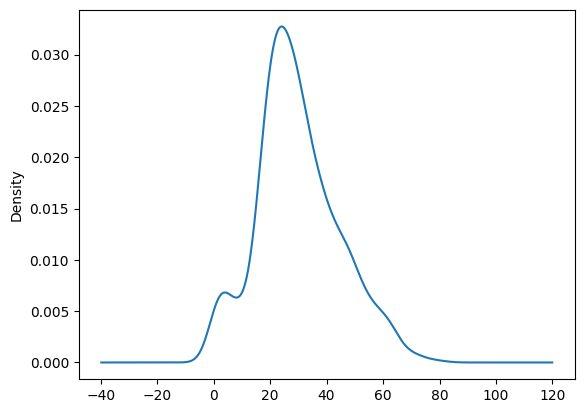

In [ ]:
#step 2:- visualization
df['Age'].plot(kind='kde')
'''
showing normal dist almost
'''

<Axes: >

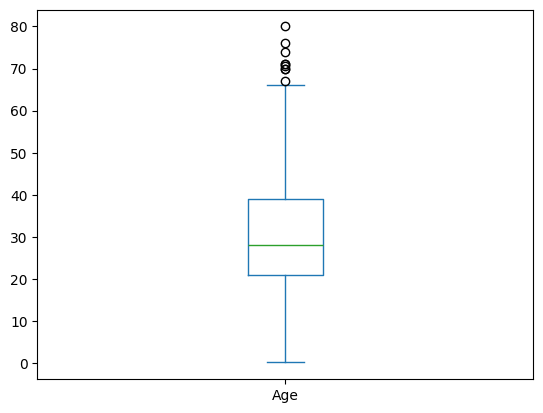

In [ ]:
#step 3:- detecting outliers.
df['Age'].plot(kind='box')
'''
it literally shows after which value of age, the outliers start. after max value of around 68, outliers (bubbles) start.
'''

In [ ]:
df[df['Age'] > 65]
'''
we print the outlier rows in order to analyse it. this helps us with determining whether to keep outliers or not. for eg:- if outlier is
not possible only, as in the age is 300, we cant keep the row. we need to delete it.
'''

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0.0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0.0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0.0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0.0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1.0,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0.0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0.0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0.0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
81,973,NaN,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
96,988,NaN,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S


In [ ]:
#step 4:- skewness
df['Age'].skew()
#between -1 and 1, considered normal so it's fine

np.float64(0.40767455974362266)

In [ ]:
#step 5:- missing values as %
df['Age'].isnull().mean()
'''
over 20 % missing values which suggests, for every 5 people, one person's age missing.
'''

np.float64(0.20091673032849502)

In [ ]:
#step 6:- conclusion
'''
- Age is normally(almost) distributed
- 20% of the values are missing
- There are some outliers
'''

In [ ]:
#FARE:-
#step 1:-
df['Fare'].describe()
'''
too much diff between mean and median. so not normal as per how it is appearing.
also, min fair is 0 and max being 512, which is far away from mean and median.
'''

,Fare
count,1308.000000
mean,33.295479
std,51.758668
min,0.000000
25%,7.895800
50%,14.454200
75%,31.275000
max,512.329200


<Axes: ylabel='Density'>

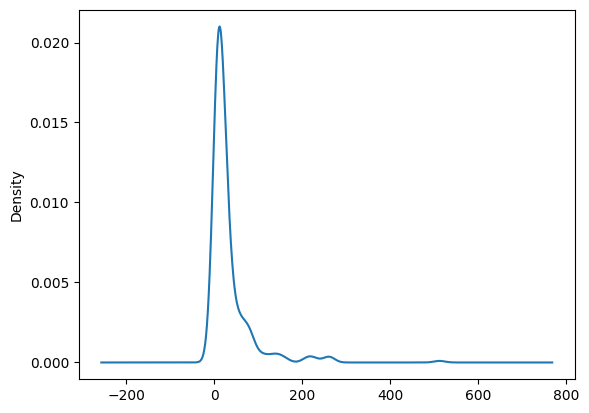

In [ ]:
#step 2:- visualization
df['Fare'].plot(kind='kde')
'''
highly right skewed.
'''

<Axes: >

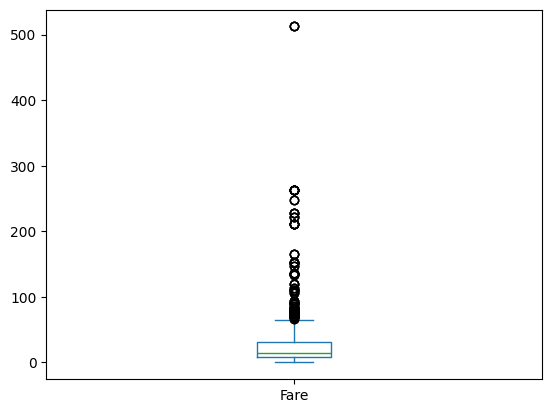

In [ ]:
#step 3:- outliers
df['Fare'].plot(kind='box')
'''
too many outliers, that too, very extreme as well.
'''

In [ ]:
df[df['Fare']>250]
'''
by printing the outlier rows, we can clearly see that people are sharing same ticket for say, fare = 263, which is not possible if we assume
that every people on titanic held a ticket.
it might be that ticket represents a single person, or it might represent a group (family, in such cases, fare obviously high as no. of
people increased)
'''

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0.0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1.0,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1.0,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1.0,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0.0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1.0,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
24,916,NaN,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C


In [ ]:
#step 4:-
df['Fare'].skew()

np.float64(4.367709134122922)

In [ ]:
#step 5:-
df['Fare'].isnull().sum()

np.int64(1)

In [ ]:
#step 6:- conclusions:-
'''
- The data is highly(positively) skewed (high outliers)
- Fare col actually contains the group fare and not the individual fare(This might be the issue for people sharing same ticket for same fare)
- We need to create a new col called individual fare, where people in group (sharing same tickets are faired individually.)
- one missing value
'''

### Steps of doing Univariate Analysis on **Categorical columns**
**Descriptive Statistics:** Compute the **frequency distribution** of the categories in the column. This will give a general understanding of the distribution of the categories and their relative frequencies.

**Visualizations:** Create visualizations to explore the distribution of the categories. Some common visualizations for categorical data include count plots and pie charts. These visualizations provide a visual representation of the distribution of the categories and can help identify any patterns or anomalies in the data.

**Missing Values:** Check for missing values in the data and decide how to handle them. Missing values can be imputed or excluded from the analysis, depending on the research question and the data set.

**Conclusion:** Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

In [ ]:
#Survived, Pclass, Sex, SibSp, Parch,Embarked
#Starting with Embarked
df['Embarked'].value_counts()

,count
Embarked,
S,914
C,270
Q,123


<Axes: xlabel='Embarked'>

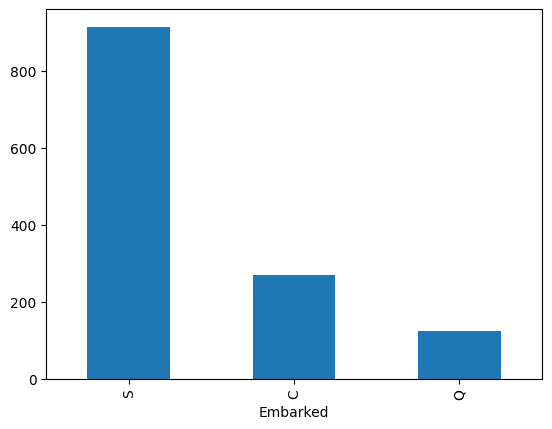

In [ ]:
df['Embarked'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

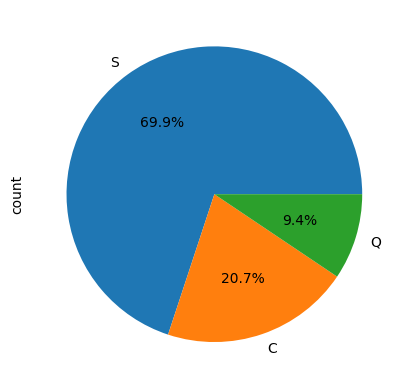

In [ ]:
df['Embarked'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [ ]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
'''
conclusion:-
Embarked means, from which port, did people board. there are 3 ports, c,s,q.
we can see, too many people from s, and rest in c and q.
just 2 missing values.
'''

In [ ]:
# Pclass
df['Pclass'].value_counts()

,count
Pclass,
3,709
1,323
2,277


In [5]:
df['Pclass'].isnull().sum()

np.int64(0)

In [ ]:
'''
Generally, you don't get much from univariate analysis of categorical columns, except for number of missing values and frequency dist.
for now, i am skipping and moving towards bivariate analysis.
'''

"\nGenerally, you don't get much from univariate analysis of categorical columns, except for number of missing values. for now, i am skipping\nand moving towards bivariate analysis. \n"

### Steps of doing Bivariate Analysis

- Select 2 cols
- Understand type of relationship
    1. **Numerical - Numerical**<br>
        a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots<br>
        b. Check correlation coefficent to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots<br>
    3. **Categorical - Categorical**<br>
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like heatmap, stacked barplots, treemaps
        
- Write your conclusions

### kisko kiske sath karne ka?
- step 1:- decide the target column
- step 2:- do bivar analysis of target column with every other column to check the relationship of each col with the target col. by doing this, we would have an idea as in which column is influencing the target column the most.



In [ ]:
'''
TARGET COLUMN = what we are the most interested in predicting. here, it is SURVIVED column.
bivar analysis helps us understand which feature has the most influence in the survival of an individual. it also gives chances of survival
of a person if he/she belonged to that feature.
'''

In [8]:
# CAT - CAT BIVAR
pd.crosstab(df['Survived'],df['Pclass'])


Pclass,1,2,3
Survived,,,
0.0,80,97,372
1.0,136,87,119


In [9]:
pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')
'''
i did normalize = 'column' because i wanted the chances of survival (cell val / total of that class) for each Pclass.
It is showing chances of surviving the highest if person belongs to Pclass 1.

'''

Pclass,1,2,3
Survived,,,
0.0,0.37037,0.527174,0.757637
1.0,0.62963,0.472826,0.242363


In [12]:
pd.crosstab(df['Survived'],df['Pclass'],normalize=True)

'''
this gives us normalization along rows. it gives us chances that the person will be in any of the 3 Pclass if he died or survived. but we
don't want that. we want to calculate chances of TARGET column and NOT the other way around.

In short, when doing crosstab, (target col, col, norm = 'columns') should be the format always.
'''

Pclass,1,2,3
Survived,,,
0.0,0.089787,0.108866,0.417508
1.0,0.152637,0.097643,0.133558


In [14]:
pd.crosstab(df['Survived'],df['Sex'],normalize='columns')

'''
chances of survival if person is female is highest. As we know from movie, they were given highest priority in lifeboats.
'''

Sex,female,male
Survived,,
0.0,0.257962,0.811092
1.0,0.742038,0.188908


In [15]:
pd.crosstab(df['Survived'],df['Embarked'],normalize='columns')

'''
the boarding port should not affect the chances of survival, as kon kaha se chada, usse kya farak padta hai kon bachega kon marega. but,
apparently, farak pada. kyu?
assumption:- port c = highest surviving chances, because mostly there were females boarded who from port c
'''

Embarked,C,Q,S
Survived,,,
0.0,0.446429,0.61039,0.663043
1.0,0.553571,0.38961,0.336957


In [17]:
pd.crosstab(df['Sex'],df['Embarked'],normalize='columns')
'''
assumption got wrong as mostly there were males who boarded from port c.
another assumption:- as we know that chances of surviving if a person belongs to pclass = 1 is high, people who boarded from port c were
mostly from pclass = 1.
'''

Embarked,C,Q,S
Sex,,,
female,0.418519,0.487805,0.318381
male,0.581481,0.512195,0.681619


In [18]:
pd.crosstab(df['Pclass'],df['Embarked'],normalize='columns')
'''
above assumption = TRUE.
'''

Embarked,C,Q,S
Pclass,,,
1,0.522222,0.024390,0.193654
2,0.103704,0.056911,0.264770
3,0.374074,0.918699,0.541575


In [27]:
df['family_members'] = 1 + df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_members
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [29]:
df[df['Fare']>250]
'''
as said earlier, fare = 263, ticket = 19950, shared between many. it implies that this ticket is combined ticket of the whole family.
we can find the individual fair by dividing the fare by no. of family members. also you can check that the ticket 19950 is also
shared with exactly 6 people, which implies that it is the combined ticket of the family, so combined fare.
'''

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_members
27,28,0.0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,6
88,89,1.0,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,6
258,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1
311,312,1.0,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,5
341,342,1.0,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,6
438,439,0.0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,6
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,2
737,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1
742,743,1.0,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,5
24,916,NaN,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,5


In [30]:
df[df['Ticket'] == '19950']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_members
27,28,0.0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S,6
88,89,1.0,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S,6
341,342,1.0,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S,6
438,439,0.0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S,6
53,945,NaN,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0,C23 C25 C27,S,6
69,961,NaN,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0,C23 C25 C27,S,6


In [31]:
df['individual_fare'] = df['Fare']/df['family_members']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_members,individual_fare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,3.62500
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,35.64165
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,7.92500
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,26.55000
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,8.05000


In [34]:
df[['individual_fare', 'Fare']].describe()
'''
mean and median greatly reduced.
'''

,individual_fare,Fare
count,1308.000000,1308.000000
mean,20.518215,33.295479
std,35.774337,51.758668
min,0.000000,0.000000
25%,7.452767,7.895800
50%,8.512483,14.454200
75%,24.237500,31.275000
max,512.329200,512.329200


<Axes: >

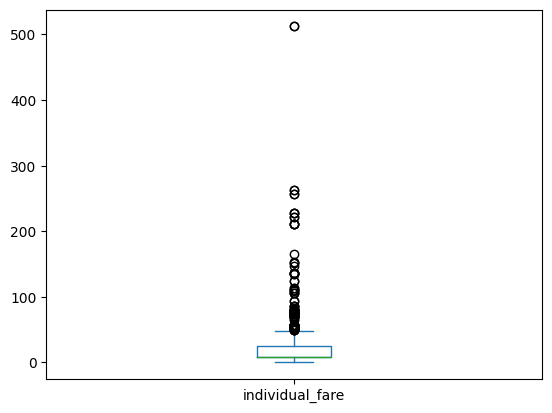

In [35]:
df['individual_fare'].plot(kind='box')
'''
still outliers persist in individual fare.
'''

In [36]:
pd.crosstab(df['Survived'],df['family_members'],normalize='columns')

'''
if person is alone or has large family (members>4), chances of surviving are low.
if person has a small family, (1<members<5), chances of surviving are high.

another way to do it is with cross tab with family categories = alone, small, large.
'''

family_members,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0.0,0.696462,0.447205,0.421569,0.275862,0.8,0.863636,0.666667,1.0,1.0
1.0,0.303538,0.552795,0.578431,0.724138,0.2,0.136364,0.333333,0.0,0.0


In [37]:
df['family_category'] = df['family_members'].apply(lambda x: 'alone' if x==1 else ('small' if 1<x<5 else 'large'))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_members,individual_fare,family_category
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,3.62500,small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,35.64165,small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,7.92500,alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,26.55000,small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,8.05000,alone


In [38]:
pd.crosstab(df['Survived'],df['family_category'],normalize='columns')

family_category,alone,large,small
Survived,,,
0.0,0.696462,0.83871,0.421233
1.0,0.303538,0.16129,0.578767


In [ ]:
# NUM - CAT BIVAR (KDE PLOTS)

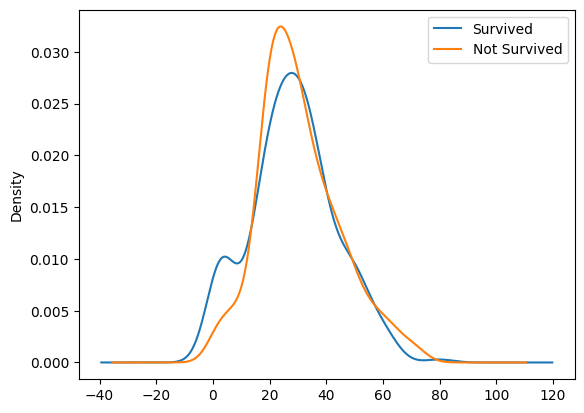

In [39]:
df[df['Survived'] == 1]['Age'].plot(kind='kde',label='Survived') #people who survived, their age plotted
df[df['Survived'] == 0]['Age'].plot(kind='kde',label='Not Survived') #people who died, their age plotted

plt.legend()
plt.show()
'''
plot suggests that many young people survived (bachhe and aurate. old people left to die or maybe attack aa gya pani dekhke)
'''

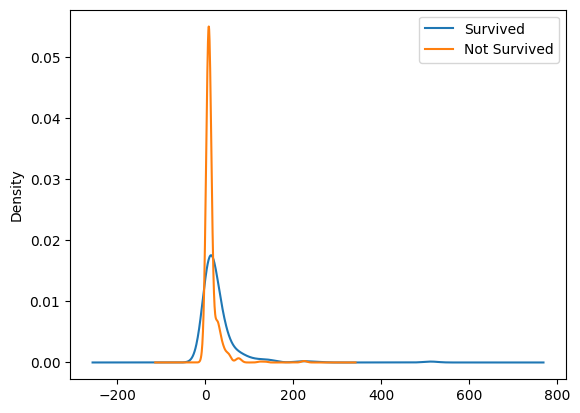

In [42]:
df[df['Survived'] == 1]['individual_fare'].plot(kind='kde',label='Survived')
df[df['Survived'] == 0]['individual_fare'].plot(kind='kde',label='Not Survived')

plt.legend()
plt.show()

In [49]:
# CAT - MIXED (convert the mixed columns into some kind of categories in order to compute cross tab)
df['title']=df['Name'].str.split(',').str.get(1).str.strip().str.split (' ').str.get(0)
df['title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'the',
       'Jonkheer.', 'Dona.'], dtype=object)

In [54]:
df['title'] = df['title'].str.replace('Rev.','other')
df['title'] = df['title'].str.replace('Dr.','other')
df['title'] = df['title'].str.replace('Col.','other')
df['title'] = df['title'].str.replace('Major.','other')
df['title'] = df['title'].str.replace('Capt.','other')
df['title'] = df['title'].str.replace('the','other')
df['title'] = df['title'].str.replace('Jonkheer.','other')

In [55]:
temp_df = df[df['title'].isin(['Mr.','Miss.','Mrs.','Master.','other'])]
temp_df['title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'other'], dtype=object)

In [57]:
pd.crosstab(temp_df['Survived'],temp_df['title'],normalize='columns')
'''
as we know more females survived, you can clearly see down there.
'''

title,Master.,Miss.,Mr.,Mrs.,other
Survived,,,,,
0.0,0.425,0.302198,0.843327,0.208,0.5
1.0,0.575,0.697802,0.156673,0.792,0.5


In [ ]:
#doing for cabin:-
'''
in case of cabin, the first letter suggests deck, a,b,c, and so on. according to wiki, decks a,b,c were only reserved for pclass 1.
so, we can say that decks a,b,c = pclass 1 only.
'''

In [59]:
df['deck'] = df['Cabin'].str.get(0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_members,individual_fare,family_category,title,deck
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,3.62500,small,Mr.,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,35.64165,small,Mrs.,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,7.92500,alone,Miss.,NaN
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,26.55000,small,Mrs.,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,8.05000,alone,Mr.,NaN


In [61]:
pd.crosstab(df['Pclass'],df['deck'])

deck,A,B,C,D,E,F,G,T
Pclass,,,,,,,,
1,22,65,94,40,34,0,0,1
2,0,0,0,6,4,13,0,0
3,0,0,0,0,3,8,5,0


In [64]:
pd.crosstab(df['Survived'],df['deck'], normalize = 'columns')

deck,A,B,C,D,E,F,G,T
Survived,,,,,,,,
0.0,0.533333,0.255319,0.40678,0.242424,0.25,0.384615,0.5,1.0
1.0,0.466667,0.744681,0.59322,0.757576,0.75,0.615385,0.5,0.0
